In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
weather = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Supervised\CLIMATE_scaled_sup.csv")
answers = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

In [3]:
# Drop unwanted columns
weather = weather.drop(columns=["DATE","MONTH"])
answers = answers.drop(columns=["DATE"])

In [5]:
X = weather
y = answers

In [6]:
y = y.loc[X.index]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1064, 169)
(457, 169)
(1064, 15)
(457, 15)


In [10]:
#stations to drop
stations_to_drop = ['GDANSK', 'ROMA', 'TOURS']

# Drop the station columns
weather = weather.drop(columns=[col for col in weather.columns 
                                      if any(station in col for station in stations_to_drop)]) 

In [12]:
#Train decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print("Decision Tree Train Accuracy:", tree.score(X_train, y_train))
print("Decision Tree Test Accuracy:", tree.score(X_test, y_test))

#pruning
pruned_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
pruned_tree.fit(X_train, y_train)

print("Pruned Tree Train Accuracy:", pruned_tree.score(X_train, y_train))
print("Pruned Tree Test Accuracy:", pruned_tree.score(X_test, y_test))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.26258205689277897
Pruned Tree Train Accuracy: 0.4558270676691729
Pruned Tree Test Accuracy: 0.3063457330415755


C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


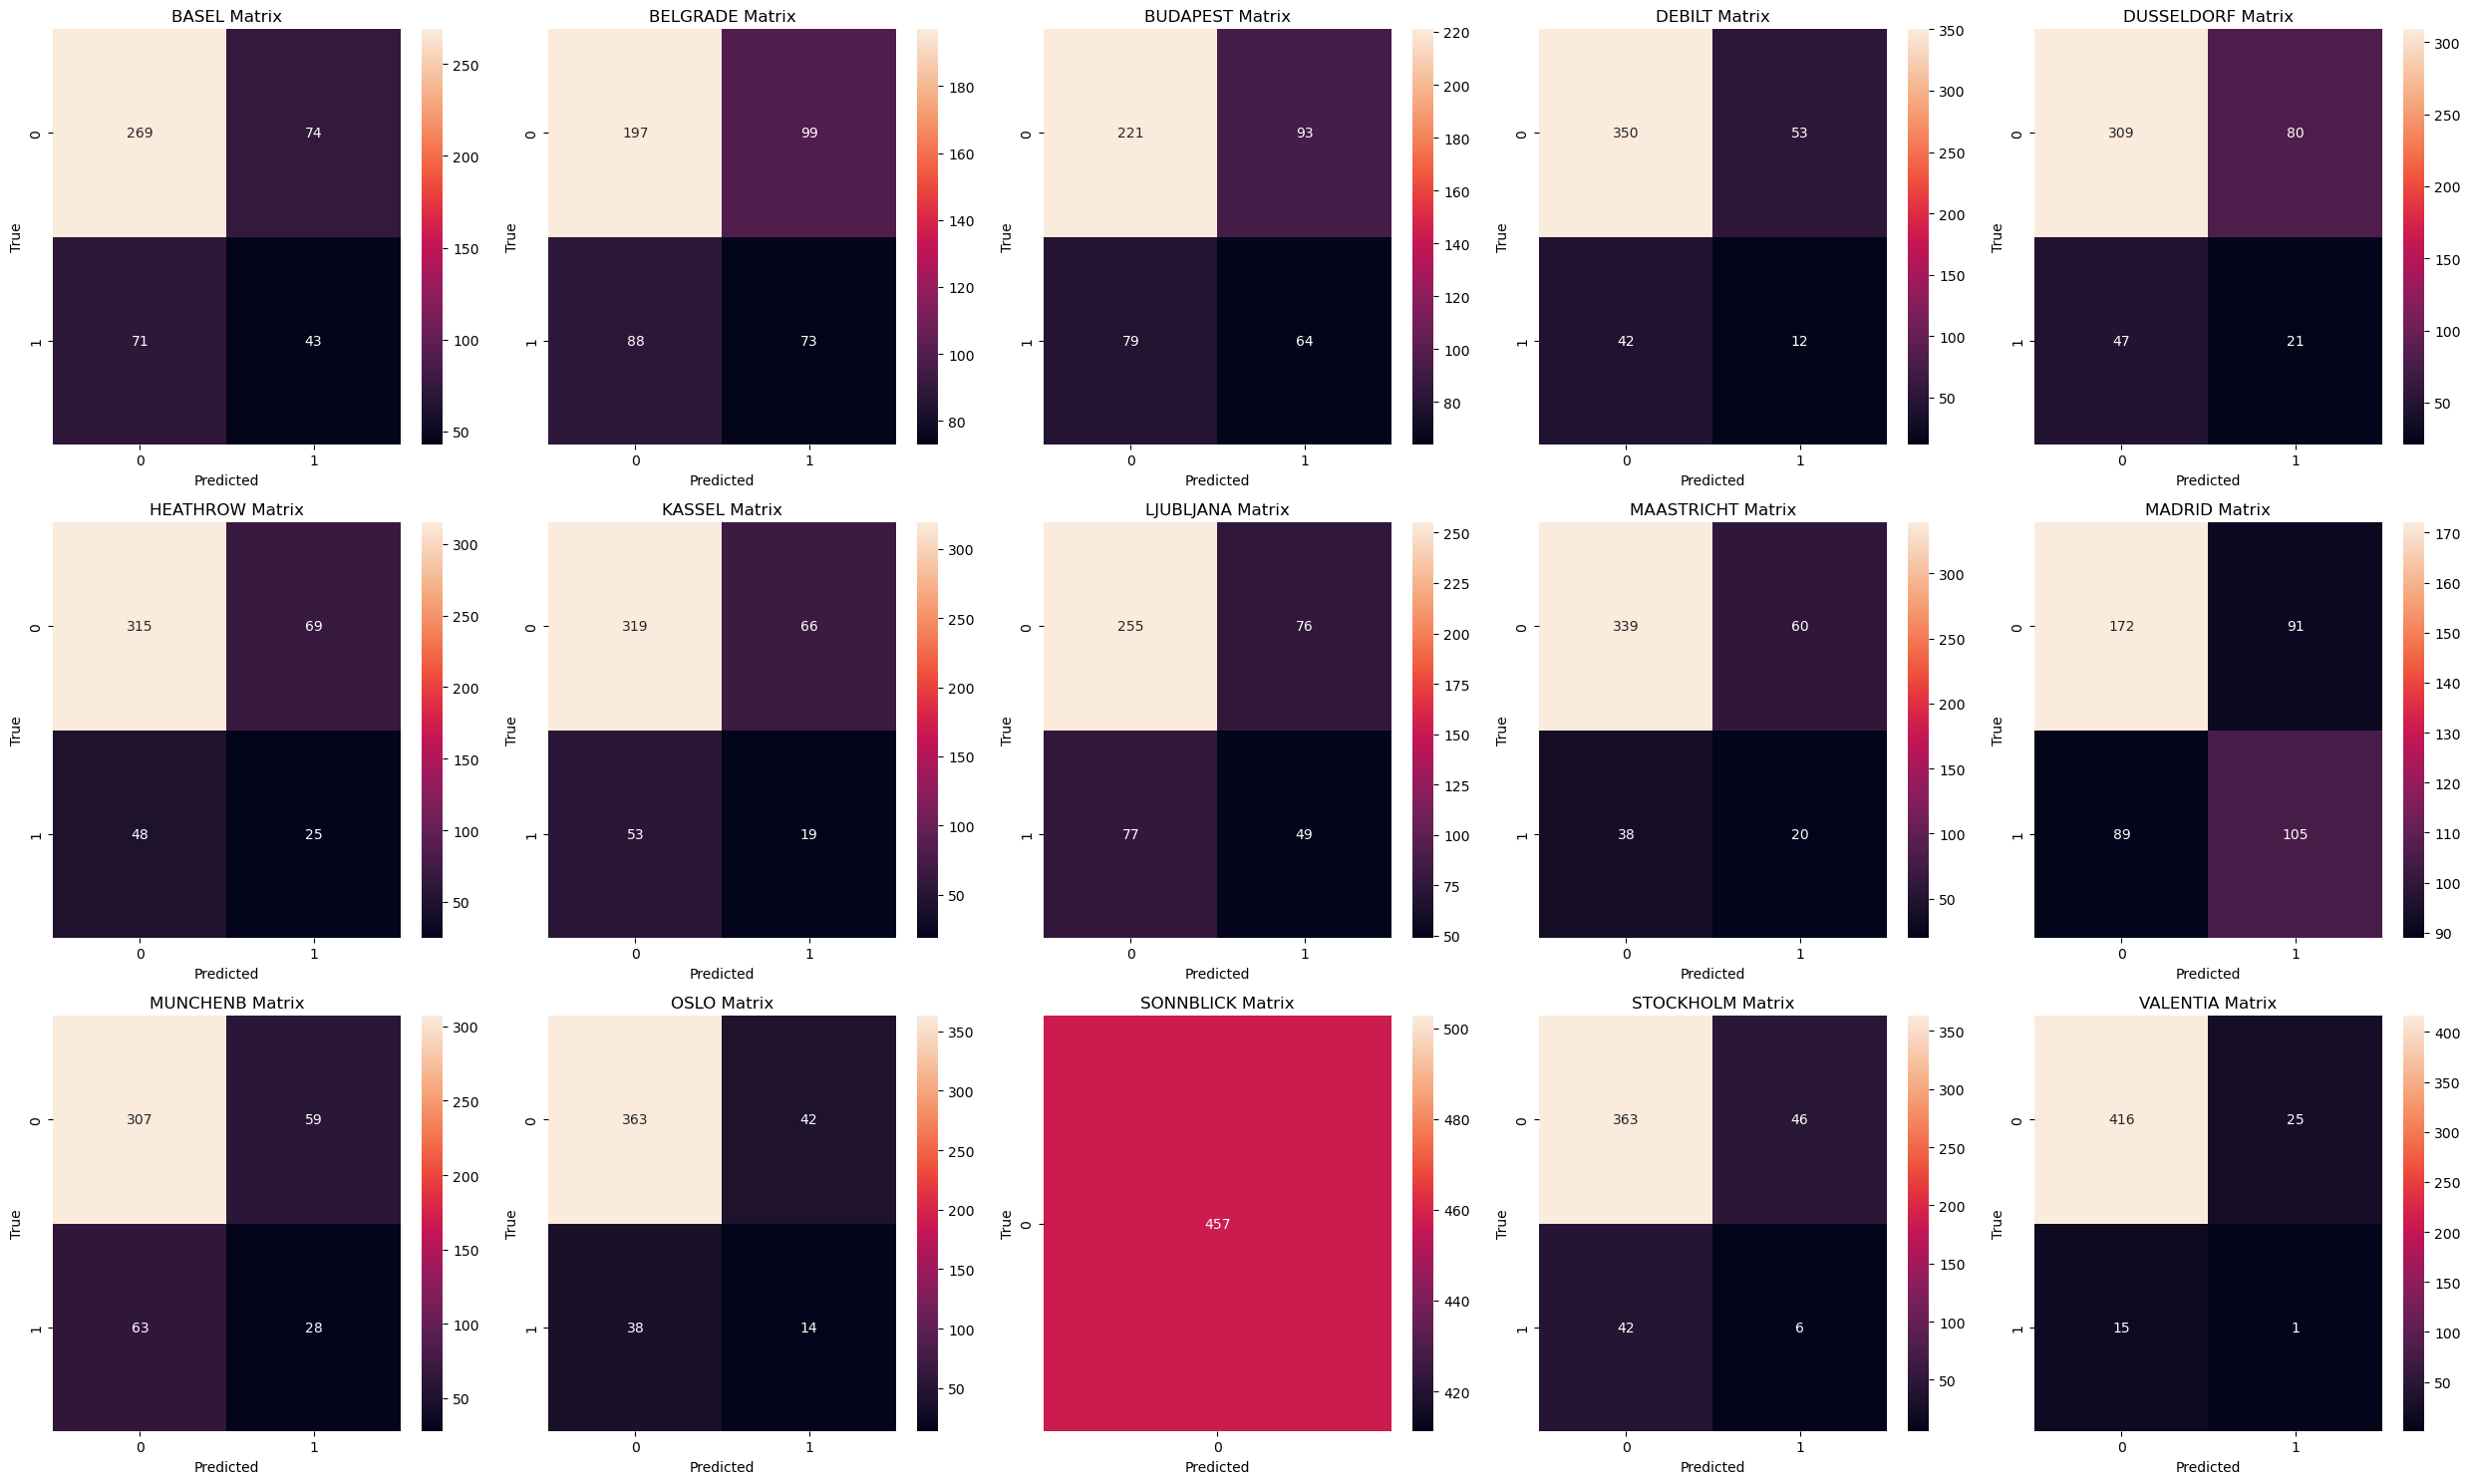

In [18]:
skip_stations = ['GDANSK', 'ROMA', 'TOURS']
locations = [col.split("_")[0] for col in y.columns if not any(s in col for s in skip_stations)]
locations = sorted(list(set(locations)))

key = "_pleasant_weather"

#Predictions from model 
tree = DecisionTreeClassifier(random_state=42)

#Train the model
tree.fit(X_train, y_train)

#Make predictions
y_pred = tree.predict(X_test)

# Plot confusion matrices
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name+key], y_pred[:, count])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
            ax[i,j].set_title(name + ' Matrix')
            ax[i,j].set_xlabel('Predicted')
            ax[i,j].set_ylabel('True')
            count += 1
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


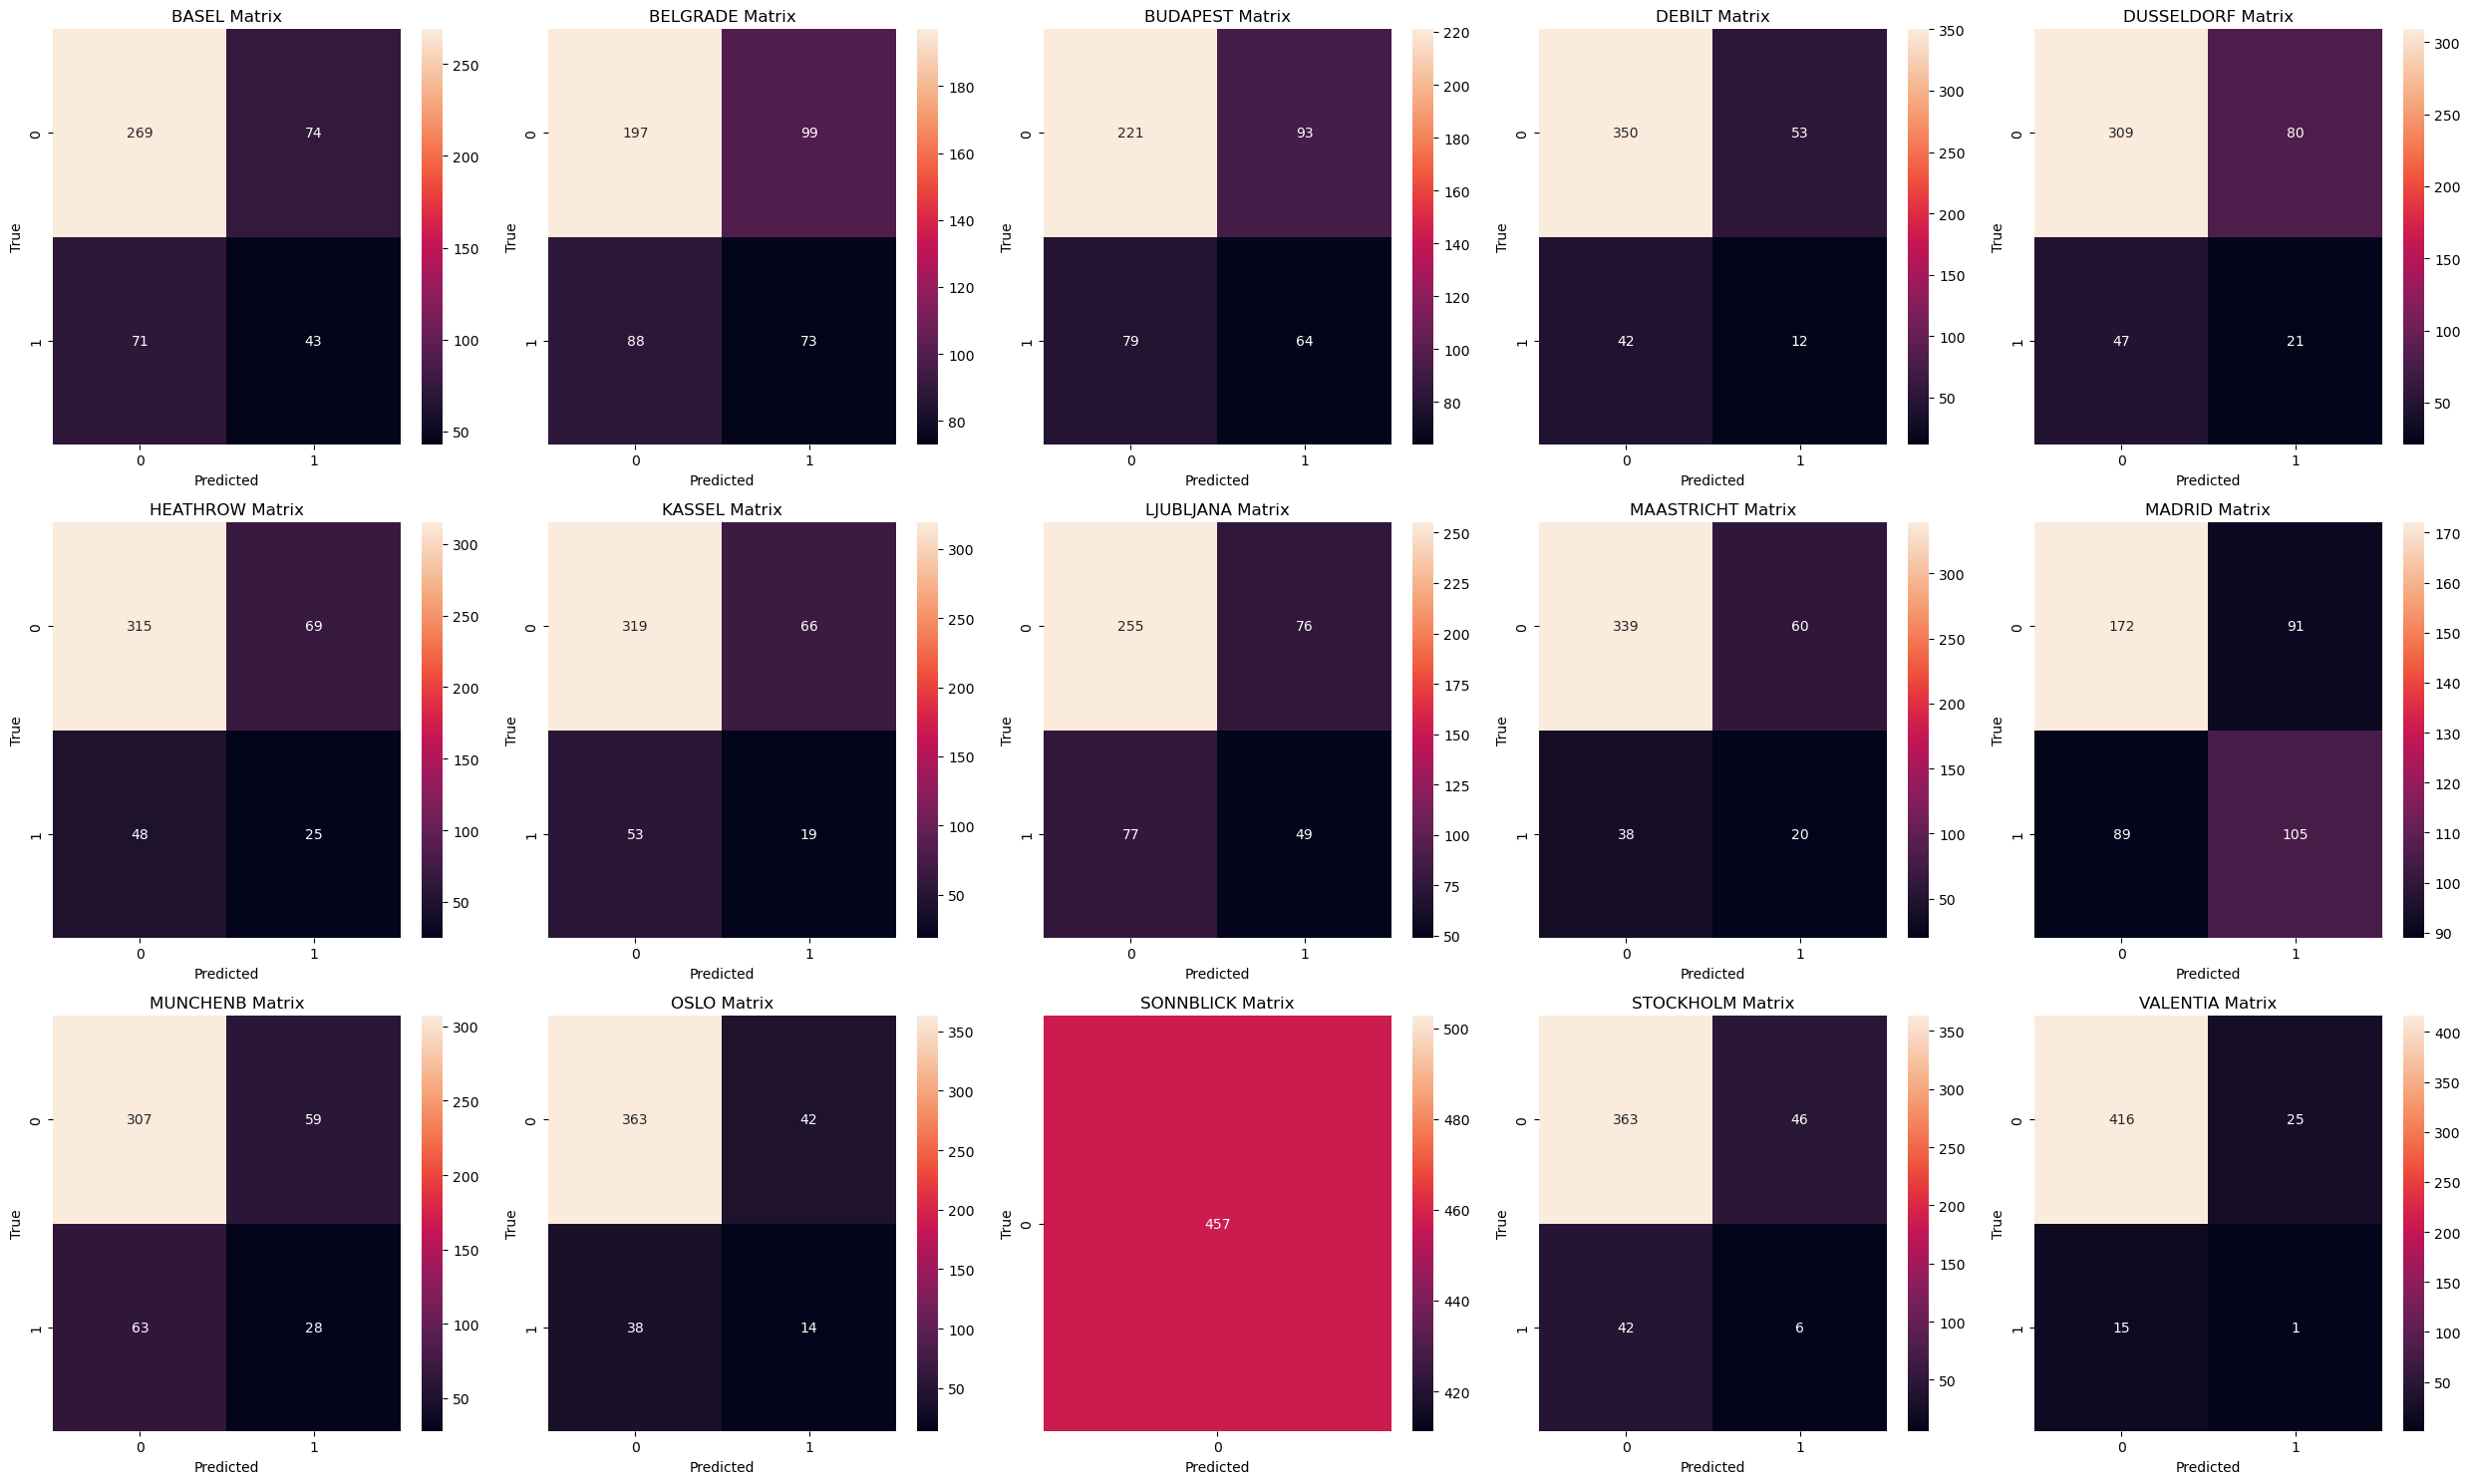

In [19]:
skip_stations = ['GDANSK', 'ROMA', 'TOURS']
locations = [col.split("_")[0] for col in y.columns if not any(s in col for s in skip_stations)]
locations = sorted(list(set(locations)))

key = "_pleasant_weather"

#Predictions from model 
pruned_tree = DecisionTreeClassifier(random_state=42)

#Train the model
pruned_tree.fit(X_train, y_train)

#Make predictions
y_pred = pruned_tree.predict(X_test)

# Plot confusion matrices
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name+key], y_pred[:, count])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
            ax[i,j].set_title(name + ' Matrix')
            ax[i,j].set_xlabel('Predicted')
            ax[i,j].set_ylabel('True')
            count += 1
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.show()

In [16]:
# Scale features for ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train ANN
ann = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, tol=1e-4, random_state=42)
ann.fit(X_train_scaled, y_train)

print("ANN Train Accuracy:", ann.score(X_train_scaled, y_train))
print("ANN Test Accuracy:", ann.score(X_test_scaled, y_test))

ANN Train Accuracy: 1.0
ANN Test Accuracy: 0.2603938730853392


C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


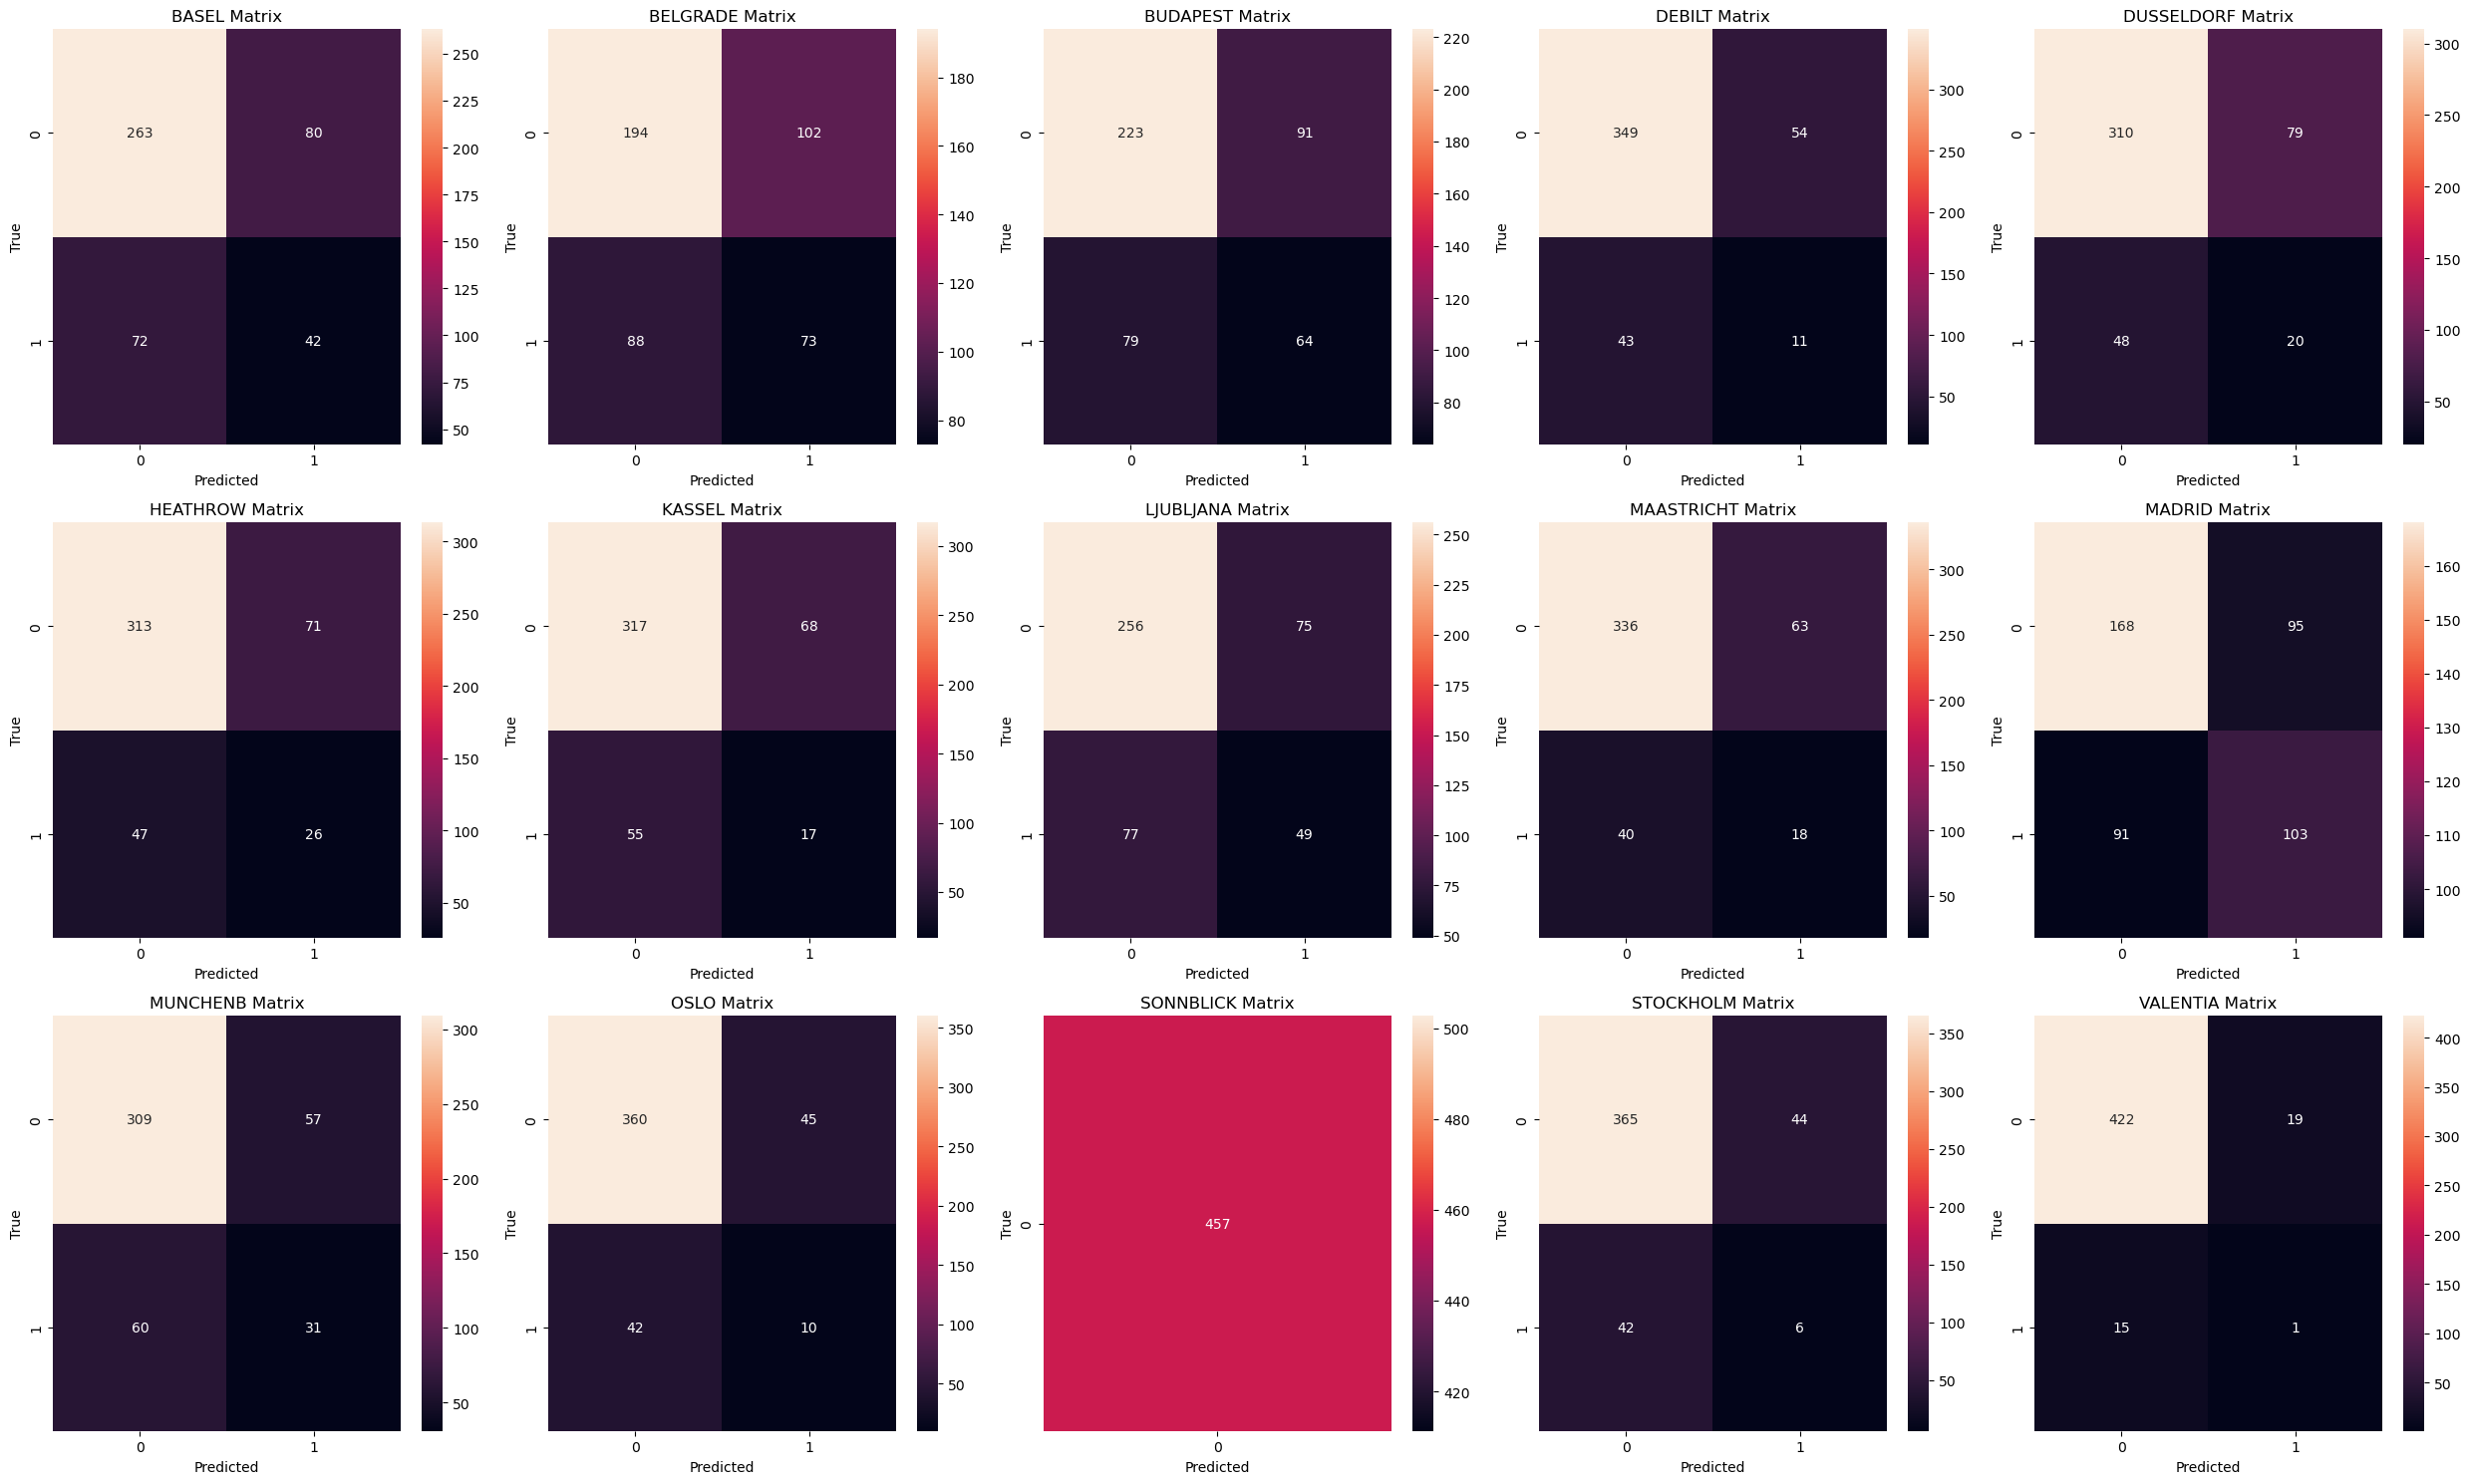

In [20]:
skip_stations = ['GDANSK', 'ROMA', 'TOURS']
locations = [col.split("_")[0] for col in y.columns if not any(s in col for s in skip_stations)]
locations = sorted(list(set(locations)))

key = "_pleasant_weather"

#Predictions from model 
ann = DecisionTreeClassifier(random_state=42)

#Train the model
ann.fit(X_train, y_train)

#Make predictions
y_pred = ann.predict(X_test_scaled)  

# Plot confusion matrices
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name+key], y_pred[:, count])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
            ax[i,j].set_title(name + ' Matrix')
            ax[i,j].set_xlabel('Predicted')
            ax[i,j].set_ylabel('True')
            count += 1
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.show()

In [23]:
# Train ANN
ann1 = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000, tol=1e-3, random_state=42)
ann1.fit(X_train_scaled, y_train)

print("ANN Train Accuracy:", ann1.score(X_train_scaled, y_train))
print("ANN Test Accuracy:", ann1.score(X_test_scaled, y_test))

ANN Train Accuracy: 0.7791353383458647
ANN Test Accuracy: 0.28665207877461707


C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


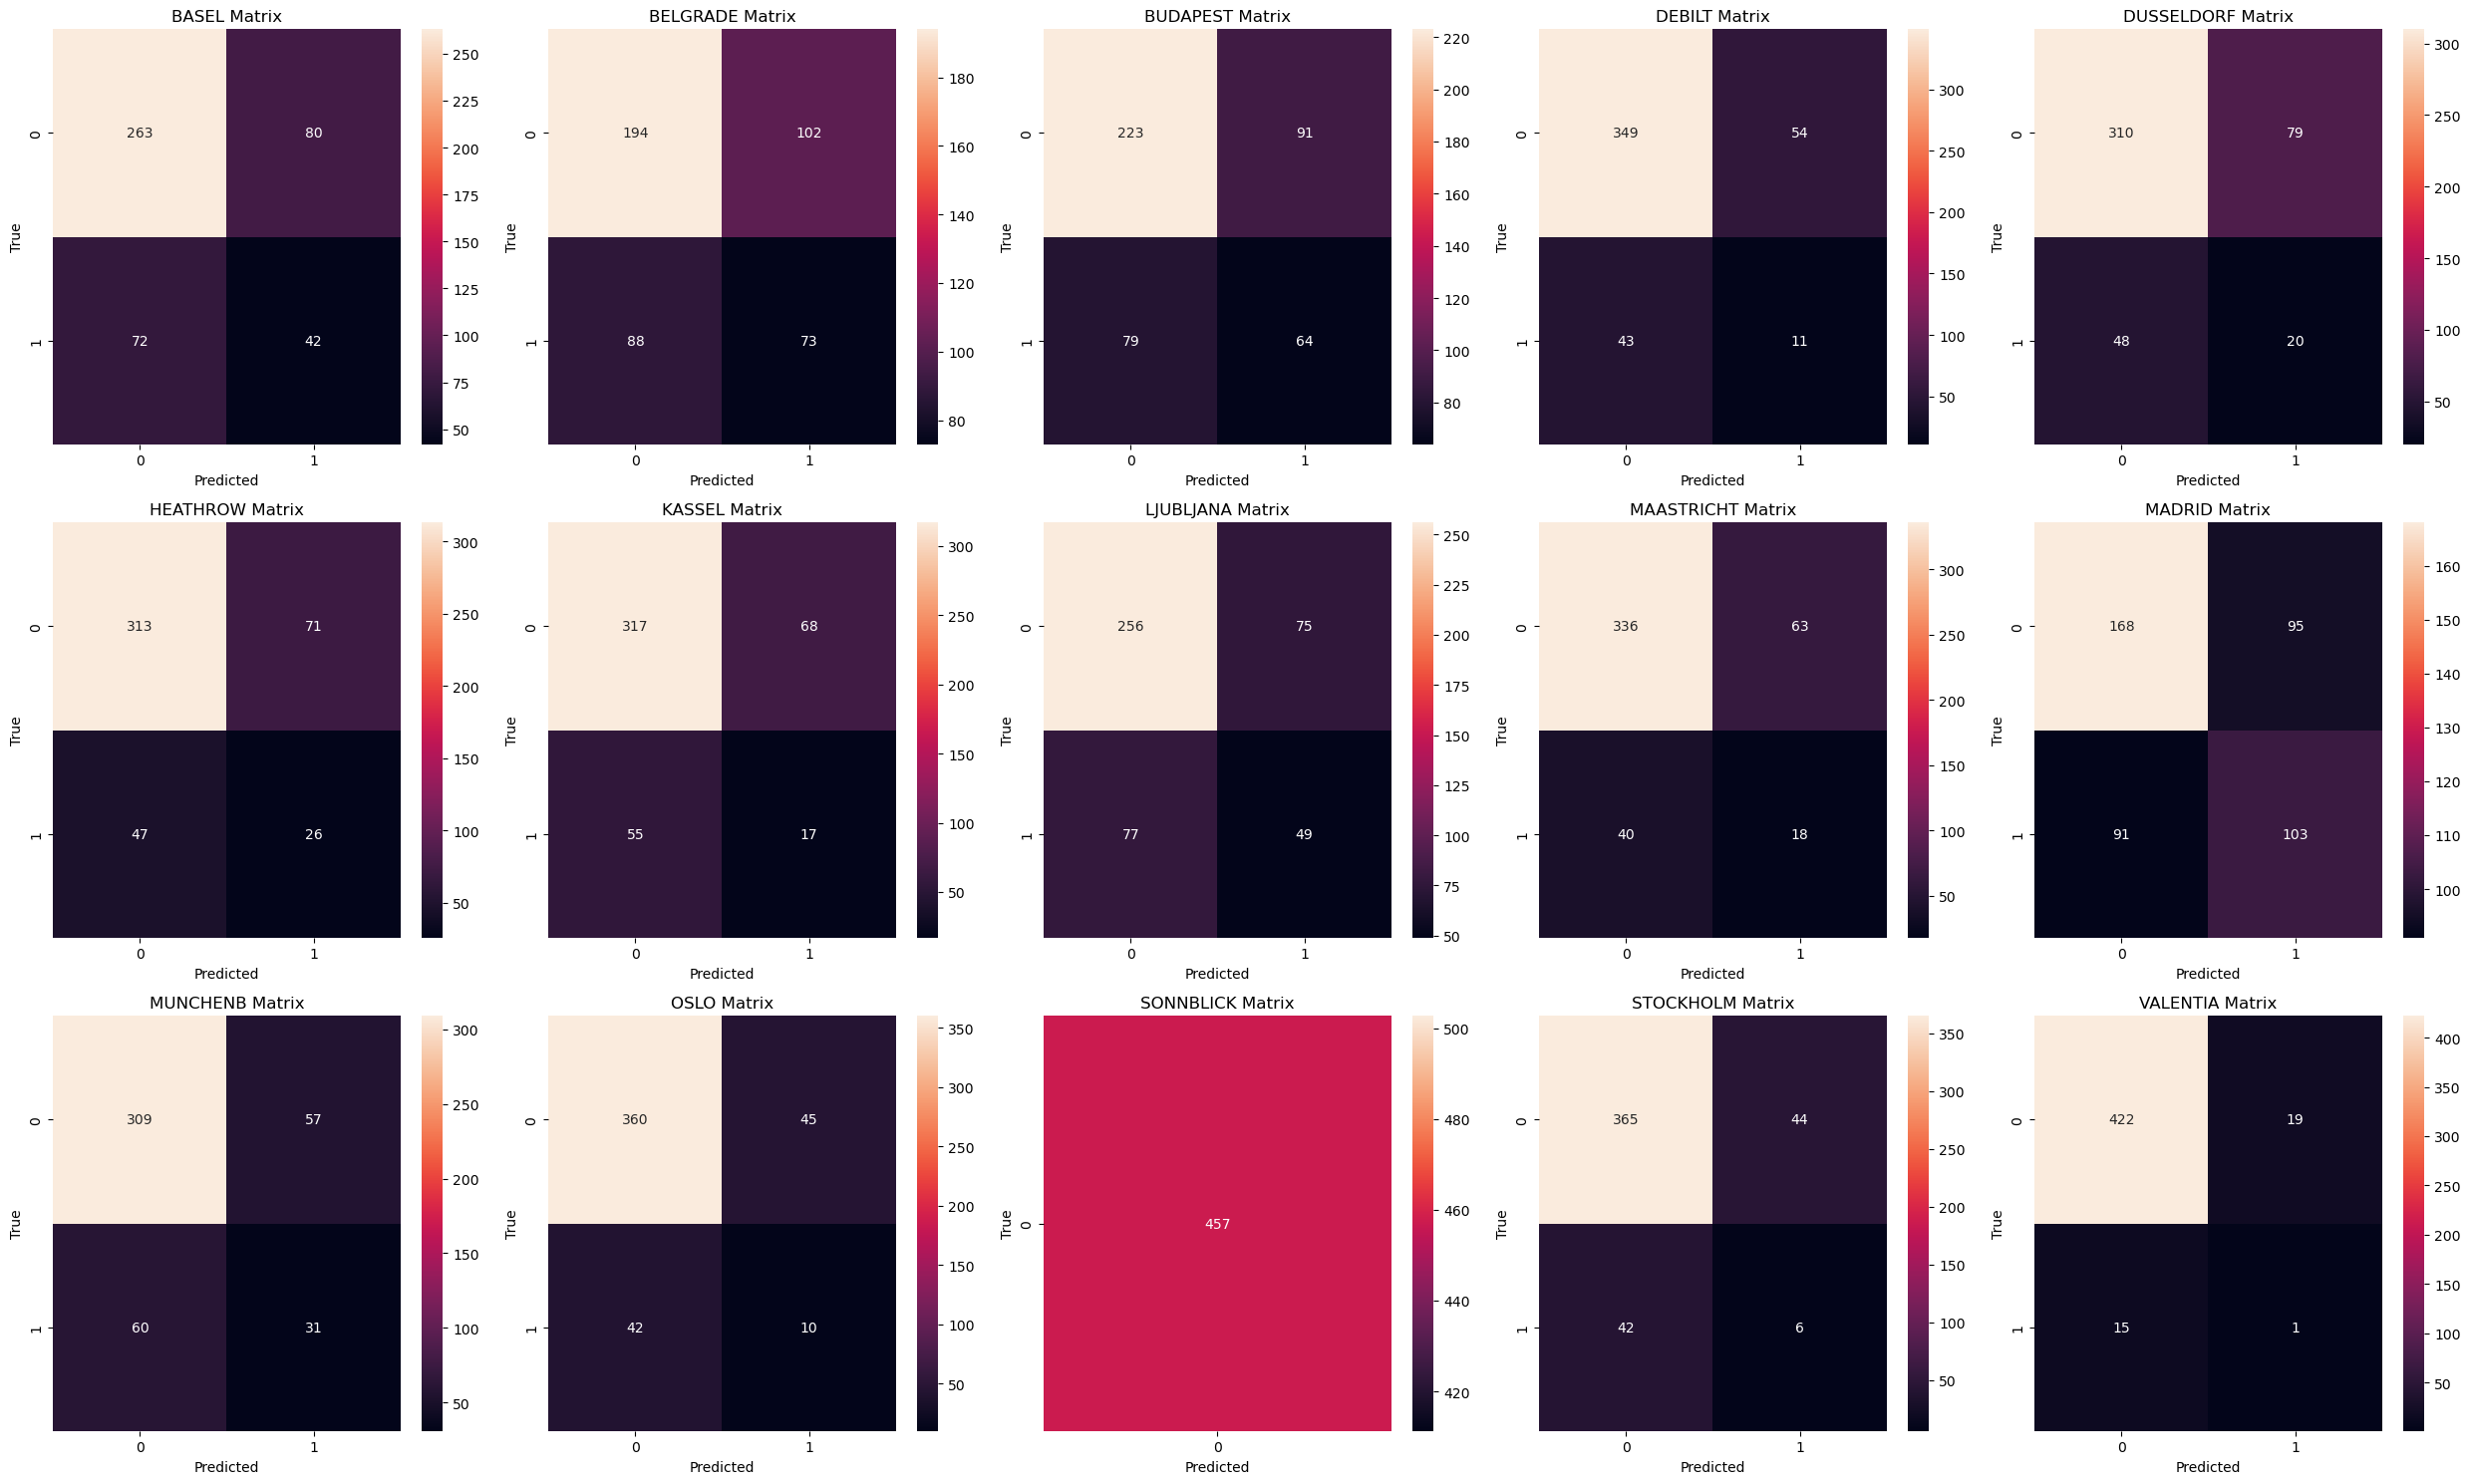

In [24]:
#Predictions from model 
ann1 = DecisionTreeClassifier(random_state=42)

#Train the model
ann1.fit(X_train, y_train)

#Make predictions
y_pred = ann1.predict(X_test_scaled)  

# Plot confusion matrices
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name+key], y_pred[:, count])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
            ax[i,j].set_title(name + ' Matrix')
            ax[i,j].set_xlabel('Predicted')
            ax[i,j].set_ylabel('True')
            count += 1
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.show()